<a href="https://colab.research.google.com/github/andergisomon/arangodb-hackathon/blob/dev_Ammar/Spork_of_1_HackathonNotebookTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template

### Step 0: Package Installation & setup

Just install ```jedi``` first

In [ ]:
!pip install jedi
!pip install pip-tools==6.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 4.0 MB/s eta 0:00:00


Make a ```requirements.in``` text that has ```nx-arangodb``` in it and upload to ```/content/``` in Colab. Then run the following to generate a dependency list.

In [ ]:
!pip-compile '/content/requirements.in'

#
# This file is autogenerated by pip-compile with Python 3.11
# by the following command:
#
#    pip-compile /content/requirements.in
#


Install ```nx-arangodb``` based on the generated ```requirements.txt```.

In [ ]:
!pip install nx-arangodb -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 whic

Install again if some dependencies are still not resolved:

In [ ]:
# 1. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb

!pip install nx-arangodb

In [ ]:
# 2. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable

!nvidia-smi
!nvcc --version

Wed Mar  5 14:59:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 3. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!

!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
# 4. Install LangChain & LangGraph

# !pip install --upgrade langchain langchain-community langchain-openai langgraph
!pip install --upgrade langchain langchain-community langgraph
!pip install -U langchain-core langchain-mistralai
!!capture --no-stderr
!pip install --upgrade --quiet langgraph langchain-community beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


In [ ]:
# 5. Import the required modules

import networkx as nx
import nx_arangodb as nxadb

from arango import ArangoClient

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_mistralai.chat_models import ChatMistralAI
from langchain_community.graphs import ArangoGraph
from arango import ArangoClient, exceptions # For AQL execution error handling
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool

[14:59:45 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


Key: A7K3bqlcBkmvNTXHOcA4tgZwfKczavLa

In [ ]:
# 6. Connect to the ArangoDB database

db = ArangoClient(hosts="https://fc54bbcbe286.arangodb.cloud:8529").db(username="root", password="OS0pStxrZG0wk7hVhzUW", verify=True)

print(db)

<StandardDatabase _system>


### Step 1: Choose & prepare your dataset for NetworkX

This section will provide a template for data transformation, including placeholders for loading CSV/JSON files, defining graph schemas, and preparing data for ingestion.

In [ ]:
# 1. Download the dataset
!wget https://snap.stanford.edu/data/finefoods.txt.gz

--2025-03-05 14:59:47--  https://snap.stanford.edu/data/finefoods.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122104202 (116M) [application/x-gzip]
Saving to: ‘finefoods.txt.gz’

finefoods.txt.gz    100%[===================>] 116.45M  17.9MB/s    in 5.0s    

2025-03-05 14:59:52 (23.1 MB/s) - ‘finefoods.txt.gz’ saved [122104202/122104202]



In [ ]:
!gunzip finefoods.txt.gz # Unzip the dataset

In [ ]:
def parse_data(file_path): # Function for parsing the dataset
       data = []
       current_record = {}
       with open(file_path, 'r') as file:
           for line in file:
               line = line.strip()
               #print(f"Current line: {line}") # Don't run print here. It will mess up Colab
               if not line:  # Empty line indicates end of a record
                   if current_record:
                       data.append(current_record)
                       current_record = {}
               else:
                   # Check if the delimiter is present before splitting
                   if ': ' in line:
                       key, value = line.split(': ', 1)
                       current_record[key] = value
                   else:
                       # Handle lines without the delimiter (e.g., print or skip)
                       print(f"Skipping delimiterless entry in record: {line}")

                       # or continue to skip the line silently

           if current_record:  # Append the last record
               data.append(current_record)
               print(f"Record successfully appended: {current_record}")
       return data

In [ ]:
!iconv -f utf-8 -t utf-8 -c finefoods.txt > finefoods_cleaned.txt #sanitize finefoods.txt, some bytes are illegal in UTF-8

data = parse_data('finefoods_cleaned.txt')
finefoods = pd.DataFrame(data)

Skipping delimiterless entry in record: 88 years old. ...
Skipping delimiterless entry in record: ...creative powers b...
Skipping delimiterless entry in record: School Princi...
Skipping delimiterless entry in record: School Princi...
Skipping delimiterless entry in record: I am a voracious reader/li...
Skipping delimiterless entry in record: School Princi...
Skipping delimiterless entry in record: ...creative powers b...


In [ ]:
# 2. Load the dataset into a CSV
# Reference: https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#analysis
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# mathoverflow = pd.read_csv(
#     "./sx-mathoverflow-a2q.txt.gz",
#     compression="gzip",
#     sep=" ",
#     names=["start_node", "end_node"],
# )

# mathoverflow

### Step 2: Convert and Load Graph Data into NetworkX

This section will include placeholders for defining graph nodes, edges, and visualizing small test datasets before full ingestion.

Although we are creating a NetworkX Graph from a Pandas Edgelist in this example, there many other ways you can load data into NetworkX.

For more information about this, refer to the following documentation: https://networkx.org/documentation/stable/reference/convert.html

In [ ]:
# 1. Load the dataset a NetworkX Graph
# Reference: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

G = nx.from_pandas_edgelist(finefoods, "product/productId", "review/userId", edge_attr=["product/productId", "review/profileName", "review/helpfulness", "review/score", "review/summary", "review/text"])

print(G)

Graph with 330317 nodes and 560804 edges


Probably shouldn't run this visualize graph block, it somehow hogs up to 16GB of your system RAM for some reason

In [ ]:
# 3. Visualize the Graph
# Reference: https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#visualizing-the-graph

#plot_options = {"node_size": 3, "with_labels": False, "width": 0.15}
#pos = nx.spring_layout(G, iterations=3, seed=1721)
#fig, ax = plt.subplots(figsize=(15, 9))
#nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

### Step 3: Persist the Graph in ArangoDB

This section will include pre-written code templates for interacting with ArangoDB, making it easier for participants to insert and query their data.

For this new [nxadb.Graph()](https://nx-arangodb.readthedocs.io/en/latest/classes/graph.html) object, we will pass `name="Facebook"`, `db=db`, and `incoming_graph_data=G_nx`. This last parameter allows us to load the NetworkX Graph directly into ArangoDB:

In [ ]:
# 1. Load the NetworkX Graph into ArangoDB
# Reference: https://github.com/arangodb/nx-arangodb?tab=readme-ov-file#can-i-create-an-arangodb-graph-from-an-existing-networkx-graph

G_adb = nxadb.Graph(
    name="Finefoods",
    db=db,
    incoming_graph_data=G,
    write_batch_size=10000, # feel free to modify
    overwrite_graph=True,
)

print(G_adb)

[15:00:12 +0000] [INFO]: Overwriting graph 'Finefoods'
INFO:nx_arangodb:Overwriting graph 'Finefoods'
[15:00:12 +0000] [INFO]: Graph 'Finefoods' exists.
INFO:nx_arangodb:Graph 'Finefoods' exists.
[15:00:12 +0000] [INFO]: Default node type set to 'Finefoods_node'
INFO:nx_arangodb:Default node type set to 'Finefoods_node'
[2025/03/05 15:00:12 +0000] [281] [INFO] - adbnx_adapter: Instantiated ADBNX_Adapter with database '_system'
INFO:adbnx_adapter:Instantiated ADBNX_Adapter with database '_system'


Output()

Output()

[2025/03/05 15:01:37 +0000] [281] [INFO] - adbnx_adapter: Created ArangoDB 'Finefoods' Graph
INFO:adbnx_adapter:Created ArangoDB 'Finefoods' Graph


Graph named 'Finefoods' with 330317 nodes and 510001 edges


Great! We've created our first [nxadb.Graph()](https://nx-arangodb.readthedocs.io/en/latest/classes/graph.html) object.

Note that there are [4 Graph Types](https://networkx.org/documentation/stable/reference/classes/index.html) in NetworkX, which are also supported as [nxadb Graphs](https://nx-arangodb.readthedocs.io/en/latest/classes/index.html):

1. `nxadb.Graph`: This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
2. `nxadb.DiGraph`: Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).
3. `nxadb.MultiGraph`: A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.
4. `nxadb.MultiDiGraph`: A directed version of a MultiGraph.

Let's continue with the same Graph for now, and re-instantiate the `G_adb` object to showcase the persistence factor!

In [ ]:
# 2. Re-connect to the same Graph

G_adb = nxadb.Graph(name="Finefoods", db=db)

print(G_adb)

[15:01:38 +0000] [INFO]: Graph 'Finefoods' exists.
INFO:nx_arangodb:Graph 'Finefoods' exists.
[15:01:39 +0000] [INFO]: Default node type set to 'Finefoods_node'
INFO:nx_arangodb:Default node type set to 'Finefoods_node'


Graph named 'Finefoods' with 330317 nodes and 520804 edges


Feel free to take a moment to view the created graph in ArangoDB:

1. Log into your deployment with username `root` and your designated password.
2. Select your database (most likely `_system`)
3. Navigate to the `GRAPHS` tab (selectable on the left-hand side after login)
4. Click on your graph (in this example, it would be called `Facebook`)
5. Experiment with the visualizer options to learn more about your Graph

For example, here's a quick sample of our `Facebook` graph:

<p align="center">
    <img src="attachment:54d53cbe-c3b4-407a-9acf-b141c561f14f.png" style="height: 400px;">
</p>

### Step 4: Build the Agentic App with LangChain & LangGraph

This section will provide pre-built agent templates, guiding participants on how to dynamically select AQL vs. NetworkX/cuGraph execution paths based on user input.

Reference:
- https://www.langchain.com/
- https://www.langchain.com/langgraph

In [ ]:
# 1. Create the ArangoGraph LangChain wrapper
# Reference: https://api.python.langchain.com/en/latest/graphs/langchain_community.graphs.arangodb_graph.ArangoGraph.html

arango_graph = ArangoGraph(db)

We're gonna use models from MistralAI:

API Key (Do not delete this): ```A7K3bqlcBkmvNTXHOcA4tgZwfKczavLa```

In [ ]:
from getpass import getpass

MISTRAL_API_KEY = getpass()

··········


In [ ]:
# Important to prevent to many requests from being sent to MistralAI
from langchain_core.rate_limiters import InMemoryRateLimiter

rate_limiter = InMemoryRateLimiter(
    requests_per_second=0.1,  # <-- Super slow! We can only make a request once every 10 seconds!!
    check_every_n_seconds=0.1,  # Wake up every 100 ms to check whether allowed to make a request,
    max_bucket_size=3,  # Controls the maximum burst size.
)

In [ ]:
import os

os.environ["MISTRAL_API_KEY"] = MISTRAL_API_KEY

llm = ChatMistralAI(
    model = "mistral-small-latest",
    temperature = 0.5,
    max_tokens = 1000,
    rate_limiter=rate_limiter,
)

In [ ]:
# importing time module
import time

In [ ]:
# 4. Define the Text to AQL Tool
# Reference: https://python.langchain.com/docs/integrations/graphs/arangodb/
# Reference: https://python.langchain.com/api_reference/community/chains/langchain_community.chains.graph_qa.arangodb.ArangoGraphQAChain.html
# Note: It is encouraged to experiment and improve this section! This is just a placeholder:
@tool
def text_to_aql_to_text(query: str):
    """This tool is available to invoke the
    ArangoGraphQAChain object, which enables you to
    translate a Natural Language Query into AQL, execute
    the query, and translate the result back into Natural Language.
    """

    llm = ChatMistralAI(model = "mistral-small-latest", temperature = 0.5, max_tokens = 1000, rate_limiter=rate_limiter,)

    time.sleep(0.1)

    chain = ArangoGraphQAChain.from_llm(
    	llm=llm,
    	graph=arango_graph,
    	verbose=True,
      allow_dangerous_requests=True,
      max_aql_generation_attempts = 4
    )

    result = {}

    attempt = 1
    MAX_ATTEMPTS = 5

    for attempt in range(attempt, MAX_ATTEMPTS):
        time.sleep(0.1)
        try:
            result = chain.invoke(query)
        except exceptions.ArangoServerError as e:
            attempt = attempt + 1
            print("Attempt number", attempt)
            print(f"AQL EXEC ERROR: {e}")
            return f"AQL EXEC ERROR: {e}"
        else:
            break

    # Process_logs_list.append(str(result["result"]) + "\n") # For display in gradio process logs

    return str(result["result"])

In [ ]:
# 5. Define the Text to NetworkX/cuGraph Tool
# Note: It is encouraged to experiment and improve this section! This is just a placeholder:

@tool
def text_to_nx_algorithm_to_text(query):
    """This tool is available to invoke a NetworkX Algorithm on
    the ArangoDB Graph. You are responsible for accepting the
    Natural Language Query, establishing which algorithm needs to
    be executed, executing the algorithm, and translating the results back
    to Natural Language, with respect to the original query.

    If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use
    this tool.
    When you generate the Python code, only output the executable python code. Do not add the word "python" or anything
    that might cause the code to return a syntax error.
    """
    ########################

    llm_invoke_prompt = f"""
    I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

    I have the following graph analysis query: {query}.

    Generate the Python Code required to answer the query using the `G_adb` object.

    Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

    Only assume that networkx is installed, and other base python dependencies.

    Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

    Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

    Make sure that `FINAL_RESULT` stores a short & concise answer. Avoid setting this variable to a long sequence.
    Your code:
    """
    global Process_logs_list

    llm = ChatMistralAI(model = "mistral-small-latest", temperature = 0.5, max_tokens = 1000, rate_limiter=rate_limiter,)

    print("1) Generating NetworkX code")
    # Process_logs_list.append("1) Generating NetworkX code\n") # For display in gradio process logs

    text_to_nx = llm.invoke(llm_invoke_prompt).content
    time.sleep(0.1)
    text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()

    print('-'*10)
    print(text_to_nx_cleaned)
    print('-'*10)

    # Process_logs_list.append("----------\n") # For display in gradio process logs
    # Process_logs_list.append(text_to_nx_cleaned)
    # Process_logs_list.append("----------\n")

    ######################

    print("\n2) Executing NetworkX code")
    # Process_logs_list.append("\n2) Executing NetworkX code\n")

    global_vars = {"G_adb": G_adb, "nx": nx}
    local_vars = {}

    # try:
    #     exec(text_to_nx_cleaned, global_vars, local_vars)
    #     text_to_nx_final = text_to_nx
    # except Exception as e:
    #     print(f"EXEC ERROR: {e}")
    #     return f"EXEC ERROR: {e}"
    # TODO: Consider experimenting with a code corrector!
    attempt = 1
    MAX_ATTEMPTS = 5

    for attempt in range(attempt, MAX_ATTEMPTS):
        time.sleep(0.1)
        try:
            text_to_nx_final = llm.invoke(llm_invoke_prompt).content
            text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx_final, flags=re.MULTILINE).strip()

            print("Attempt number", attempt)
            # Attempt_number = "Attempt number " + str(attempt) + "\n"
            # Process_logs_list.append(Attempt_number)

            exec(text_to_nx_cleaned, global_vars, local_vars)
        except BaseException as e:
            attempt = attempt + 1
            print("Attempt number", attempt)
            print(f"EXEC ERROR: {e}")

            # Attempt_number = "Attempt number " + str(attempt) + "\n"
            # Process_logs_list.append(Attempt_number)

            # EXEC_ERROR = "EXEC ERROR: " + str(e) + "\n" # <-- Does this even work
            # Process_logs_list.append(EXEC_ERROR)

            return f"EXEC ERROR: {e}"
            continue
        else:
            break

    print('-'*10)
    FINAL_RESULT = local_vars["FINAL_RESULT"]
    print(f"FINAL_RESULT: {FINAL_RESULT}")
    print('-'*10)

    # FINAL_RESULT = local_vars["FINAL_RESULT"]

    # Process_logs_list.append("----------\n") # For display in gradio process logs
    # Process_logs_list.append("FINAL_RESULT: " + str(FINAL_RESULT))
    # Process_logs_list.append("----------\n")

    ######################

    print("3) Formulating final answer")
    # Process_logs_list.append("3) Formulating final answer\n")

    time.sleep(0.1)
    nx_to_text = llm.invoke(f"""
        I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

        I have the following graph analysis query: {query}.

        I have executed the following python code to help me answer my query:

        ---
        {text_to_nx_final}
        ---

        The `FINAL_RESULT` variable is set to the following: {FINAL_RESULT}.

        Based on my original Query and FINAL_RESULT, generate a short and concise response to
        answer my query.

        Your response:
    """).content

    # Process_logs_list.append(nx_to_text + "\n") # For display in gradio process logs

    return nx_to_text


In [ ]:
# 7. Experiment with example queries
# Note: Some may work, some may not!

# query = "What is your favourite fruit?"
# query = "Are there isolated nodes?"
# query = "Which node has the highest betweenness centrality score? Use a k value of 10"
# query = "Who is connected to Node 0?"
# query = "What is the shortest path from Node 0 to Node 1?"
# query = "Update node 0 to have attribute foo=bar"
# query = "Is the graph fully connected?"
# query = "What is the average degree of nodes?"
# query = "Are there nodes that, if removed, would fragment the network?"
# query = "Which users are outliers in terms of connections?"
# query = "Which nodes are the most connected?"
# query = "How strongly connected is the network? Used connected components"
# query = "Fetch the highest pagerank node and value"
# query = "Who is the most influential node?"
# query = "Who is the most popular person in the Graph? Explain why"


### Step AA: Create chat history & retrieve tool


In [ ]:
from langchain.agents import AgentExecutor, create_tool_calling_agent, tool
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
# Implementation based on: https://python.langchain.com/docs/how_to/qa_chat_history_how_to/

import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install -qU "langchain[mistralai]"
!pip install -qU langchain-mistralai
!pip install -qU langchain-core

In [ ]:
from langchain.chat_models import init_chat_model
from langchain_mistralai import MistralAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore

llm = init_chat_model("mistral-small-latest", model_provider="mistralai",temperature = 0.5, max_tokens = 1000, rate_limiter=rate_limiter,)
embeddings = MistralAIEmbeddings(model="mistral-embed")
vector_store = InMemoryVectorStore(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_mistralai/embeddings.py:181: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [ ]:
# This looks at previous queries to see if there has already been any answers to the current one.
@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query. If there no information is found,
    ask the agent to use other tools instead.
    """
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

### Step BB: Define the name of description of all tools
Trying to get the LLM to know how to call tools

In [ ]:
from langchain_core.tools import tool
from langchain.tools import Tool
from langchain_core.tools.structured import StructuredTool

In [ ]:
text_to_aql_to_text.name = "Text_to_AQL_to_Text"
text_to_nx_algorithm_to_text.name = "Text_to_NetworkX_cuGraph"
retrieve.name = "Retrieve"

text_to_aql_to_text.description = "This tool is available to invoke the ArangoGraphQAChain object, which enables you to translate a Natural Language Query into AQL, execute the query, and translate the result back into Natural Language."
text_to_nx_algorithm_to_text.description = "This tool is available to invoke a NetworkX Algorithm on the ArangoDB Graph. You are responsible for accepting the Natural Language Query, establishing which algorithm needs to be executed, executing the algorithm, and translating the results back to Natural Language, with respect to the original query. If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use this tool. When you generate the Python code, only output the executable python code. Do not add the word 'python' or anything that might cause the code to return a syntax error."
retrieve.description = "Retrieve information related to a query. If there no information is found, ask the agent to use other tools instead."

tools = [retrieve, text_to_aql_to_text, text_to_nx_algorithm_to_text]

### Step CC: Create the agent

In [ ]:
from langgraph.prebuilt import create_react_agent

memory = MemorySaver()

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant. If one tool doesn't work, use another tool."),
        ("placeholder", "{chat_history}"),
        ("human", "{messages}"),                # changes {input} -> {messages}
        ("placeholder", "{agent_scratchpad}"),
    ]
) # TODO: prompt template needs to specify generated plot output

agent = create_react_agent(llm,tools=tools, prompt=prompt, checkpointer=memory)

### Step DD: Define file storing functions

In [ ]:
config = {"configurable": {"thread_id": "10"}}

In [ ]:
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛⠛⠿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠛⠉⠁⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⠋⠈⠀⠀⠀⠀⠐⠺⣖⢄⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡏⢀⡆⠀⠀⠀⢋⣭⣽⡚⢮⣲⠆⠀⠀⠀⠀⠀⠀⢹⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡇⡼⠀⠀⠀⠀⠈⠻⣅⣨⠇⠈⠀⠰⣀⣀⣀⡀⠀⢸⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡇⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣟⢷⣶⠶⣃⢀⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡅⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⠀⠈⠓⠚⢸⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⢀⡠⠀⡄⣀⠀⠀⠀⢻⠀⠀⠀⣠⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠐⠉⠀⠀⠙⠉⠀⠠⡶⣸⠁⠀⣠⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣦⡆⠀⠐⠒⠢⢤⣀⡰⠁⠇⠈⠘⢶⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⠠⣄⣉⣙⡉⠓⢀⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣤⣀⣀⠀⣀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

In [ ]:
import pandas as pd

In [ ]:
from pathlib import Path
from langchain_core.messages import AIMessage, HumanMessage, RemoveMessage
""" Can Remove This

# Don't really need to define a global dataframe, qHistory lists are enough
# query_history = pd.DataFrame(columns=["HumanMessage", "AIMessage"]) #,"GeneratedPlotPath"])
# query_history = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}) # FOR TESTING
"""

qHistory_AI = []
qHistory_Human = []

# Function for saving current queries and answers into a downloadable .csv file
def save_curr_query_history():
    # global query_history

    # Save the current queries into a dataframe
    # query_history = pd.DataFrame({"HumanMessage": qHistory_Human,
    #                                "AIMessage": qHistory_AI,})
                                # "GeneratedPlotPath": Generated_plot_list})

    print("Saved current query history as a dataframe!")

    # Save the current queries into a csv file
    query_history.to_csv('/content/user_query_history.csv', index = False)
    print("Saved current query history into a csv file!")

# Function for providing past queries and answers to the LLM as context
# Run if user chooses to upload past history, prolly don't need this function if user has to upload file before executing gradio
def load_past_query_history():
    global qHistory_AI
    global qHistory_Human

    my_file = Path("/content/user_query_history.csv")
    if my_file.is_file():
        # File exists, so load it into qHistory_Human and QHistory_AI
        print("File exists")

        df = pd.read_csv('/content/user_query_history.csv')
        qHistory_Human = df['A'].tolist()   # Obviously change col to HumanMessage
        qHistory_AI = df['B'].tolist()      # Obviously change col to AIMessage

        print(qHistory_Human)
        print(qHistory_AI)

        # Now load them into the memory
        # It's expected that len(qHistory_Human) == len(qHistory_AI)
        # So each query is paired with an answer
        for i in range(len(qHistory_Human)):
            _ = agent.update_state(config, {"messages": [HumanMessage(qHistory_Human[i])]})
            _ = agent.update_state(config, {"messages": [AIMessage(qHistory_AI[i])]})

    else:
        print("File Don't Exist")
        # File doesn't exist


### Step EE: Define functions for Gradio

In [ ]:
# Important function for gradio
# https://python.langchain.com/api_reference/langchain/agents/langchain.agents.tool_calling_agent.base.create_tool_calling_agent.html for chat history
# As of now, just run it before gradio, so user must upload first before executing gradio

# if lets say there's a button, then remove this, and run when button pressed
# load_past_query_history()

Generated_plot_list = [] # List for images generated by the AI

Process_logs_list = []

max_tokens = 1000

# Function for trimming the number of messages (Kinda shoddy but works)
def Check_N_Trim():
    currMessages = agent.get_state(config).values["messages"]

    # First message (index 0) is definitely HumanMessage (Earliest query)
    # Remove the earliest query and all the associated ToolMessage or AIMessage
    agent.update_state(config, {"messages": RemoveMessage(id=currMessages[0].id)})

    # For a valid list, the first message should be HumanMessage.
    # So remove all the responses until the next query (HumanMessage)
    while (agent.get_state(config).values["messages"][0].type != "human"):
        currMessages = agent.get_state(config).values["messages"]
        agent.update_state(config, {"messages": RemoveMessage(id=currMessages[0].id)})

    return "Finished trimming"

# def update_process_logs():
#   global Process_logs_list
#   return " ".join(Process_logs_list)

def ReviewBot(query, history):
    global check_final_state
    #global query_history
    global qHistory_AI
    global qHistory_Human
    #global Generated_plot_list

    # Remove the oldest query if the number of AIMessages + HumanMessages + ToolMessages exceeds 100
    currMessages = agent.get_state(config).values["messages"]
    while(len(currMessages) > 100):
      Check_N_Trim()

    # Generate the output
    final_state = agent.invoke({"messages": [{"role": "user", "content": query}]}, config=config)

    # Store the answers to the query for storing in a .csv file later
    qHistory_Human.append(query)
    qHistory_AI.append(final_state["messages"][-1].content)

    if (query == "Meow"): # If an graph/chart/plot is generated, add onto Generated_plot_list
      print("Do nothing")
      #Generated_plot_list.append(the generated_graph or whatever)

    # Instantly output the process logs
    display_logs = "Empty"#update_process_logs()

    # First return is for chat output; Second return is for the chart(s); Third is for process logs
    return final_state["messages"][-1].content, Generated_plot_list, display_logs #final_state["output"], Generated_plot_list, display_logs

### Step FF: Create user frontend with Gradio
Gradio app

In [ ]:
# 8. (Optional) Set up UI via Gradio
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [ ]:
with gr.Blocks() as demo:
  with gr.Row():

    with gr.Column(scale=1): # Column for charts/graph and such
      SaveCurrHistory = gr.Button("Save Current Chat History") # All it does is convert the current lists into a dataframe
      SaveCurrHistory.click(save_curr_query_history)

      plots_gallery = gr.Gallery(
                   label="Graphs/Charts",
                   show_label=False,
                   elem_id="gallery",
                   columns = [1],
                   object_fit="contain",
                   height="auto"
                   )

      with gr.Accordion("Process Logs"): # For process logs
        process_logs = gr.Textbox(value = update_process_logs, every = 0.1, show_label = False)

    with gr.Column(scale=5): # Column for the chatbot
      gr.ChatInterface(fn=ReviewBot,
                          type="messages",
                          # Gotta change these example prompts
                          examples=["What is the significance of the imaginary number, i, in Schrodinger's equation?",
                                    "Find the 20th number in the following sequence: 1, 4, 27, 256, ...",
                                    "Provide a short explanation and derivation for the surface area of a sphere."],
                          title="Unbiased Reviewer",
                          additional_outputs= [plots_gallery, process_logs], # Instantly updates both the image generated and process logs
                          )

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://62b4fc63c1cf03106a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)




> Entering new ArangoGraphQAChain chain...
AQL Query (1):WITH Finefoods_node_to_Finefoods_node
FOR vertex IN Finefoods_node
  FILTER vertex._id == 'Finefoods_node/0'
  FOR edge IN 1..1 OUTBOUND vertex Finefoods_node_to_Finefoods_node
    RETURN edge._to

AQL Result:
[None]

> Finished chain.
1) Generating NetworkX code
----------
import networkx as nx

# Assuming G_adb is already defined and loaded with the given schema

# Step 1: Identify the node with the key '0' in the 'Finefoods_node' collection
node_id = 'Finefoods_node/0'

# Step 2: Use the neighbors function from NetworkX to find all nodes connected to node '0'
neighbors = list(G_adb.neighbors(node_id))

# Step 3: Extract the keys of the neighboring nodes
neighbor_keys = [G_adb.nodes[neighbor]['_key'] for neighbor in neighbors]

# Step 4: Format the result as a concise answer
FINAL_RESULT = f"Node 0 is connected to nodes: {', '.join(neighbor_keys)}"
----------

2) Executing NetworkX code
Attempt number 1
----------
FINAL_RESUL

In [ ]:
# query = "What is your favourite fruit?"
# query = "Are there isolated nodes?"
# query = "Which node has the highest betweenness centrality score? Use a k value of 10"
# query = "Who is connected to Node 0?"
# query = "What is the shortest path from Node 0 to Node 1?"
# query = "Update node 0 to have attribute foo=bar"
# query = "Is the graph fully connected?"
# query = "What is the average degree of nodes?"
# query = "Are there nodes that, if removed, would fragment the network?"
# query = "Which users are outliers in terms of connections?"
# query = "Which nodes are the most connected?"
# query = "How strongly connected is the network? Used connected components"
# query = "Fetch the highest pagerank node and value"
# query = "Who is the most influential node?"
# query = "Who is the most popular person in the Graph? Explain why"

In [ ]:
print(vector_store)

In [ ]:
chat_history = agent.get_state(config).values["messages"]
# print(chat_history)

for message in chat_history:
     message.pretty_print()
     #print(message.content)
    #  print(chat_history.message)

================================ Human Message =================================

Is the graph fully connected?
================================== Ai Message ==================================
Tool Calls:
  Text_to_NetworkX_cuGraph (hoIO2R0hS)
 Call ID: hoIO2R0hS
  Args:
    query: Is the graph fully connected?
================================= Tool Message =================================
Name: Text_to_NetworkX_cuGraph

The graph `G_adb` is not fully connected.
================================== Ai Message ==================================

The graph `G_adb` is not fully connected.
================================ Human Message =================================

How strongly connected is the network? Used connected components
================================== Ai Message ==================================
Tool Calls:
  Text_to_NetworkX_cuGraph (zUXuZWvEB)
 Call ID: zUXuZWvEB
  Args:
    query: How strongly connected is the network? Used connected components
=========================

In [ ]:
#MathBot("Who is connected to Node 0?", [])



> Entering new AgentExecutor chain...

Invoking: `Text_to_AQL_to_Text` with `{'query': 'Who is connected to Node 0?'}`




> Entering new ArangoGraphQAChain chain...
AQL Query (1):WITH Mathoverflow_node Mathoverflow_node_to_Mathoverflow_node MathOflow_node MathOflow_node_to_MathOflow_node Stackoverflow_node
FOR vertex IN Mathoverflow_node
  FILTER vertex._key == '0'
  FOR edge IN 1..1 OUTBOUND vertex Mathoverflow_node_to_Mathoverflow_node
    RETURN edge._to

AQL Result:
[None, None, None, None, None, None, None, None, None, None]

> Finished chain.
It appears that Node 0 in the Mathoverflow graph does not have any outgoing connections. Therefore, there are no nodes directly connected to Node 0.[{"name": "Text_to_NetworkX_cuGraph", "arguments": {"query": "Who is connected to Node 0?"}}]

> Finished chain.


AttributeError: 'numpy.ndarray' object has no attribute 'append'

# Dumpsite (Ignore from this point onwards)

In [ ]:
# # Ignore this lol
# def yes(message, history):
#     return "yes"

# def vote(data: gr.LikeData):
#     if data.liked:
#         print("You upvoted this response: " + data.value["value"])
#     else:
#         print("You downvoted this response: " + data.value["value"])

# # Use this to tell user to download/upload any saved caht file?

# with gr.Blocks() as demo:
#     chatbot = gr.Chatbot(placeholder="<strong>Your Personal Yes-Man</strong><br>Ask Me Anything")
#     chatbot.like(vote, None, None)
#     gr.ChatInterface(fn=yes, type="messages", chatbot=chatbot)

# demo.launch()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:310: UserWarning: The type of the gr.Chatbot does not match the type of the gr.ChatInterface.The type of the gr.ChatInterface, 'messages', will be used.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b96bb57b8dd26535be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# OLD MATHBOT

# def MathBot(query, history):
#     global check_final_state
#     global query_history

#     # Create the agent
#     llm = ChatMistralAI(model = "mistral-small-latest", temperature = 0.5, max_tokens = max_tokens, rate_limiter=rate_limiter,)
#     agent = create_tool_calling_agent(llm, tools, prompt)
#     agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

#     # # Calculate the total tokens in conversation history
#     # total_tokens = sum(llm.get_num_tokens(message["content"]) for message in query_history)

#     # # Remove oldest history if total tokens exceed the limit
#     # while total_tokens > max_tokens:
#     #   if len(query_history) > 2:
#     #     removed_message = query_history.pop(0)
#     #     total_tokens -= len(removed_message["content"])
#     #   else:
#     #     break

#     # Generate the output
#     final_state = agent_executor.invoke({"input": [{"role": "user", "content": query}]})

#     # Append query history into the list (Definitely can change depending on what to pass to history)
#     query_history.append({"Q_role": "user" , "Q_content": final_state["input"][0]["content"],
#                          "A_role": "AI", "A_content": final_state["output"]})

#     # Save it into the user's query history file
#     np.save('/content/user_query_history.npy', query_history)

#     return final_state["output"]

In [ ]:
Test = pd.DataFrame({"Col1": [1], "Col2": [4]})

In [ ]:
print(Test)

     Col1    Col2    0
0       1       4  NaN
1  [2, 4]  [6, 6]  NaN
2     NaN     NaN  2.0
3     NaN     NaN  6.0
4       2       6  NaN


In [ ]:
Test = pd.concat([Test, pd.DataFrame([{"Col1": 2, "Col2": 6}])], ignore_index=True)

# Code related to testing chat history/memory

In [ ]:
# # Function for trimming the number of messages (Kinda shoddy) (Testing)
# def Check_Trim():
#     currMessages = agent.get_state(config).values["messages"]

#     # Start trimmin if there are more than 100 total messages
#     if len(currMessages) > 1:

#         # First message (index 0) is definitely HumanMessage (Earliest query)
#         # Remove the earliest query and all the associated ToolMessage or AIMessage
#         agent.update_state(config, {"messages": RemoveMessage(id=currMessages[0].id)})

#         # For a valid list, the first message should be HumanMessage.
#         # So remove all the responses until the next query (HumanMessage)
#         while (agent.get_state(config).values["messages"][0].type != "human"):

#             currMessages = agent.get_state(config).values["messages"]
#             agent.update_state(config, {"messages": RemoveMessage(id=currMessages[0].id)})


#     return "Done trimming"

In [ ]:
# Check the length of the current query history
# AIMessage, HumanMessage, and ToolMessage are separate

# print("Current number of AIMessage + HumanMessages + Tool Message:", len(agent.get_state(config).values["messages"]))

Current number of AIMessage + HumanMessages + Tool Message: 2


In [ ]:
# chat_history = agent.get_state(config).values["messages"]
# print(chat_history[0])#.type == "human")

# for message in chat_history:
#        message.pretty_print()

================================ Human Message =================================

My name is James.
================================== Ai Message ==================================

Hello James! How can I assist you today?


In [ ]:
#_ = agent.update_state(config, {"messages": [HumanMessage("Hey")]})
#_ = agent.update_state(config, {"messages": [AIMessage("Hello.")]})

In [ ]:
# display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
# query = "What is your favourite fruit?"
# query = "Are there isolated nodes?"
# query = "Which node has the highest betweenness centrality score? Use a k value of 10"
# query = "Who is connected to Node 0?"
# query = "What is the shortest path from Node 0 to Node 1?"
# query = "Update node 0 to have attribute foo=bar"
# query = "Is the graph fully connected?"
# query = "What is the average degree of nodes?"
# query = "Are there nodes that, if removed, would fragment the network?"
# query = "Which users are outliers in terms of connections?"
# query = "Which nodes are the most connected?"
# query = "How strongly connected is the network? Used connected components"
# query = "Fetch the highest pagerank node and value"
# query = "Who is the most influential node?"
# query = "Who is the most popular person in the Graph? Explain why"

input_message = (
    "My name is James."
)

for event in agent.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

My name is James.
================================== Ai Message ==================================

Hello James! How can I assist you today?


In [ ]:
# For testing only, looks like work
# def query_graph(query):
#     final_state = agent.invoke({"messages": [{"role": "user", "content": query}]}, config=config)
#     return final_state["messages"][-1].content

In [ ]:
# query_graph("What is the shortest path from Node 0 to Node 1?")

# Agent 2 Probs won't use this(?)

In [ ]:
# LangGraph Implementation
from typing import Literal
from langchain_core.messages import SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, MessagesState, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.graph import StateGraph, MessagesState, START, END

tools = [retrieve, text_to_aql_to_text, text_to_nx_algorithm_to_text]
tool_node = ToolNode(tools)

llm = ChatMistralAI(model = "mistral-small-latest", temperature = 0.5, max_tokens = 1000, rate_limiter=rate_limiter,)
tooled_llm = llm.bind_tools(tools)

def should_continue(state: MessagesState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END


def call_model(state: MessagesState):
    messages = state["messages"]
    time.sleep(0.1)
    response = tooled_llm.invoke(messages)
    return {"messages": [response]}


workflow = StateGraph(MessagesState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", should_continue, ["tools", END])
workflow.add_edge("tools", "agent")

memory = MemorySaver()
agent2 = workflow.compile(checkpointer=memory)

In [ ]:
input_message = (
    "What's my name?"
)

for event in agent2.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What's my name?
================================== Ai Message ==================================

I don't have access to personal information about you. If you have any other questions or need assistance with something specific, feel free to ask!


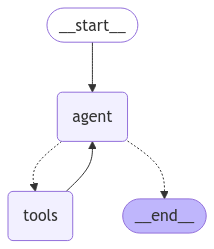

In [ ]:
# Visualise the graph
from IPython.display import Image, display

display(Image(agent2.get_graph().draw_mermaid_png()))

# Nothingburger

In [ ]:
# from langchain_core.messages import SystemMessage
# from langgraph.checkpoint.memory import MemorySaver
# from langgraph.graph import END, MessagesState, StateGraph
# from langgraph.prebuilt import ToolNode, tools_condition

# # Step 1: Generate an AIMessage that may include a tool-call to be sent.
# def query_or_respond(state: MessagesState):
#     """Generate tool call for retrieval or respond."""
#     llm_with_tools = llm.bind_tools([retrieve, text_to_aql_to_text, text_to_nx_algorithm_to_text])
#     time.sleep(0.1)
#     response = llm_with_tools.invoke(state["messages"])
#     # MessagesState appends messages to state instead of overwriting
#     return {"messages": [response]}


# # Step 2: Execute the retrieval.
# tools = ToolNode([retrieve, text_to_aql_to_text, text_to_nx_algorithm_to_text])


# # Step 3: Generate a response using the retrieved content.
# def generate(state: MessagesState):
#     """Generate answer."""
#     # Get generated ToolMessages
#     recent_tool_messages = []
#     for message in reversed(state["messages"]):
#         if message.type == "tool":
#             recent_tool_messages.append(message)
#         else:
#             break
#     tool_messages = recent_tool_messages[::-1]

#     # Format into prompt
#     docs_content = "\n\n".join(doc.content for doc in tool_messages)
#     system_message_content = (
#         "You are an assistant for question-answering tasks. "
#         "Use the following pieces of retrieved context to answer "
#         "the question. If you don't know the answer, try to use other tools. Use three sentences maximum and keep the "
#         "answer concise."
#         "\n\n"
#         f"{docs_content}"
#     )
#     conversation_messages = [
#         message
#         for message in state["messages"]
#         if message.type in ("human", "system")
#         or (message.type == "ai" and not message.tool_calls)
#     ]
#     prompt = [SystemMessage(system_message_content)] + conversation_messages

#     # Run
#     time.sleep(0.1)
#     response = llm.invoke(prompt)

#     return {"messages": [response]}


# # Build graph
# graph_builder = StateGraph(MessagesState)

# graph_builder.add_node(query_or_respond)
# graph_builder.add_node(tools)
# graph_builder.add_node(generate)

# graph_builder.set_entry_point("query_or_respond")
# graph_builder.add_conditional_edges(
#     "query_or_respond",
#     tools_condition,
#     {END: END, "tools": "tools"},
# )

# graph_builder.add_edge("tools", "generate")
# graph_builder.add_edge("generate", END)

# memory = MemorySaver()
# graph = graph_builder.compile(checkpointer=memory)